# Project 2: Difference Equations and Impulse Responses
This project investigates sampling and reconstruction and their effects.

## Objective
1. Sample the waveform $x(t)=\cos(900\pi t)+2\sin(3400\pi t)$ at a sampling frequency of $16~\text{kHz}$ for one second. assume this is a continuous-time signal since it is sampled without aliasing.
    1. Plot the first 100 points.
    2. Plot an approximate Fourier-transform magnitude of $x(t)$.
    3. Explain how this is different from the actual Fourier-transform of $x(t)$
2. Consider the effect of sampling on the original signal.
    1. Sample the waveform at a frequency of $8~\text{kHz}$ for one second to obtain $x[n]$ where $t=nT$.
    2. Plot the first 100 points.
    3. Plot a numerical approximation to the DTFT magnitude.
    4. Does aliasing occur?
3. Now consider a different sampling rate.
    1. Sample the original waveform at a sampling frequency of $2~\text{kHz}$ for one second.
    2. Repeat the steps enumerated in in #2
    3. Does aliasing occur?
4. Now we will reconstruct the signal in #1 from the sequence in #2 using zero-order hold.
    1. Form a zero-order hold signal with 2 equal output samples per input sample and plot the first 100 points as a continuous-time signal.
    2. Plot the FT magnitude approximation as from #1.
    3. Lowpass filter the ZOH with 
        <code>h = fir1(11,1/2)</code>

        <code>filt(h,1, xzoh)</code>
    4. Plot the first 100 points as a continuous-time signal. How does the signal differ from the time-domain plot in #1.
    5. Plot the FT approximation from #1. Is the signal perfectly reconstructed?

## Solutions:

We will begin by importing the relevent packages (ensure the following are installed via <code>using Pkg; Pkg.add(["Plots", "DSP", "FFTW"])</code>)

In [89]:
using Plots, DSP, FFTW

1. We can create a function to represent the continuous-time signal

In [90]:
function trig(n)
    return cos.(900*pi*n)+2*sin.(3400*pi*n)
end

trig (generic function with 1 method)

And now we can plot both the function and its FT 

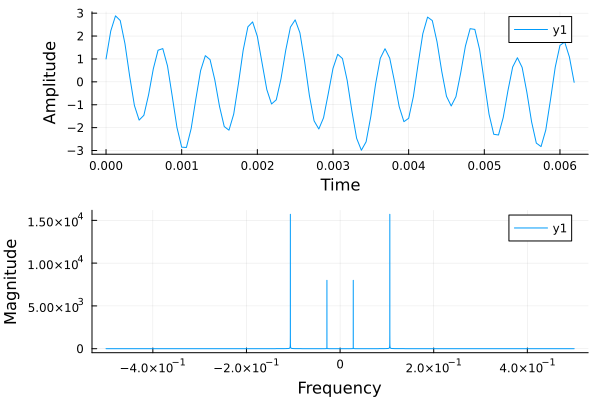

In [91]:
t = 0:1/16000:1
y = trig(t)

fft_y = fftshift(abs.(fft(y)))

p1 = plot(t[1:100],y[1:100])
xaxis!("Time")
yaxis!("Amplitude")

p2 = plot((-8000:8000)./16000, fft_y, xformatter=:scientific)
xaxis!("Frequency")
yaxis!("Magnitude")

plot(p1, p2, layout=(2,1))

This is not an exact FT because we are sampling discrete points, even if they are numerous. Thus, we lose information between the points nd would expect the magnitude to be larger for a continuous FT.

2. We now halve the sampling rate and perfome the same operation as in #1

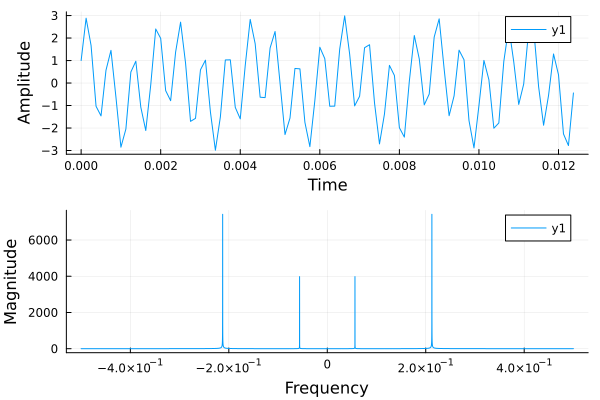

In [92]:
t = 0:1/8000:1
y1 = trig(t)

fft_y1 = fftshift(abs.(fft(y1)))

p1 = plot(t[1:100],y1[1:100])
xaxis!("Time")
yaxis!("Amplitude")

p2 = plot((-4000:4000)./8000 , fft_y1, xformatter=:scientific)
xaxis!("Frequency")
yaxis!("Magnitude")

plot(p1, p2, layout=(2,1))

Aliasing cannot occur as we are sampling ($8000~\text{Hz}$) above the Nyquist Frequency which is proporitional to double the highest frequency $3400~\text(Hz)$. 

3. We reduce the sampling rate to $2000~\text{Hz}$ and repeat the steps as in #1

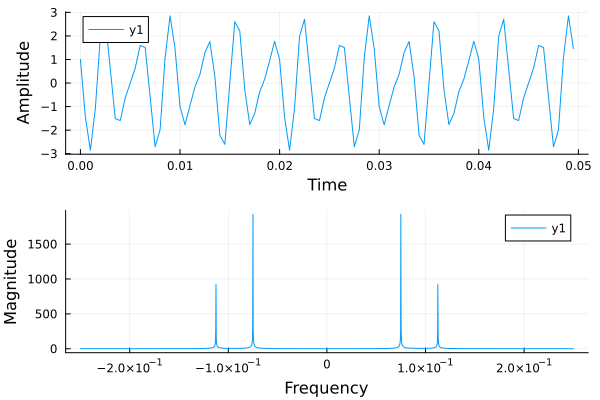

In [93]:
t = 0:1/2000:1
y2 = trig(t)

fft_y2 = fftshift(abs.(fft(y2)))

p1 = plot(t[1:100],y2[1:100])
xaxis!("Time")
yaxis!("Amplitude")

p2 = plot((-1000:1000)./4000 , fft_y2, xformatter=:scientific)
xaxis!("Frequency")
yaxis!("Magnitude")

plot(p1, p2, layout=(2,1))

We have brought the sampling rate below the minimum frequency required to generate this plot without aliasing the sine component, but the cosine component requires the minimum frequency to remain above $1800~\text{Hz}$. This means that the $3400~\text{Hz}$ component will contain information from adjacent copies but the $900~\text{Hz}$ component will not. We visualize this in the plot where the central delta functions have a broader base whereas the outer delta functions remain unaffected. We say that the $3400~\text{Hz}$ component is aliased and the $900~\text{Hz}$ component is not.

4. Lastly, we construct a zero-order hold by holding each sampled value for one sample interval.

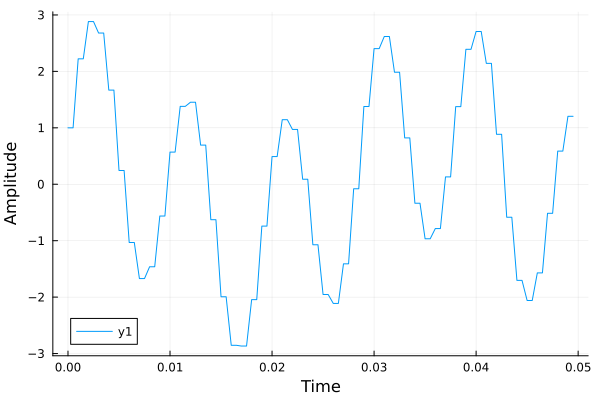

In [114]:
zoh = zeros(Float32, (2*16000, 1))
zoh[1:2:2*16000] = y[1:16000]
zoh[2:2:2*16000] = y[1:16000]

plot(t[1:100], zoh[1:100], xlabel="Time", ylabel="Amplitude")

The FT now becomes

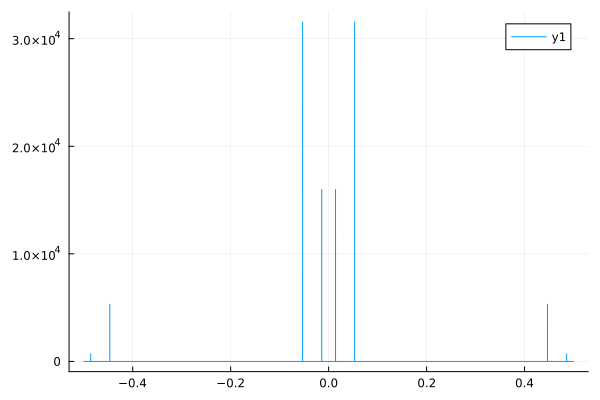

In [115]:
fft_zoh = fftshift(abs.(fft(zoh)))

plot((-16000:15999)/32002, fft_zoh)

**TBD** Need to implement low pass filter and apply to zoh function. <code>fir1</code> has no immediately obvious equivalent in Julia.